In [281]:
import torch

In [287]:
expl_method = "LayerXAct"
# transform = False
# transform = True
transform = ['spatial']
# transform = ['spatial', 'noise', 'color']
# transform = None
# tester = "ConfAOPC"
tester = "OrigAOPC"
seed = 0
mode = "insertion"

In [288]:
total_results = []

for i in range(0, 10, 1):
    log_name = f"./aopc_results/{tester}_transform_{transform}_mode_{mode}_expl_method_{expl_method}_seed_{seed}_batch_num_{i}.pt"
    print(log_name)
    try:
        log = torch.load(log_name)
        total_results.append(log)
    except:
        continue

print(total_results)
total_results = torch.stack(total_results)

./aopc_results/OrigAOPC_transform_['spatial']_mode_insertion_expl_method_LayerXAct_seed_0_batch_num_0.pt
./aopc_results/OrigAOPC_transform_['spatial']_mode_insertion_expl_method_LayerXAct_seed_0_batch_num_1.pt
./aopc_results/OrigAOPC_transform_['spatial']_mode_insertion_expl_method_LayerXAct_seed_0_batch_num_2.pt
./aopc_results/OrigAOPC_transform_['spatial']_mode_insertion_expl_method_LayerXAct_seed_0_batch_num_3.pt
./aopc_results/OrigAOPC_transform_['spatial']_mode_insertion_expl_method_LayerXAct_seed_0_batch_num_4.pt
./aopc_results/OrigAOPC_transform_['spatial']_mode_insertion_expl_method_LayerXAct_seed_0_batch_num_5.pt
./aopc_results/OrigAOPC_transform_['spatial']_mode_insertion_expl_method_LayerXAct_seed_0_batch_num_6.pt
./aopc_results/OrigAOPC_transform_['spatial']_mode_insertion_expl_method_LayerXAct_seed_0_batch_num_7.pt
./aopc_results/OrigAOPC_transform_['spatial']_mode_insertion_expl_method_LayerXAct_seed_0_batch_num_8.pt
./aopc_results/OrigAOPC_transform_['spatial']_mode_inse

In [289]:
total_results = total_results.mean(0)

In [290]:
total_results

tensor([[0.0011, 0.0163, 0.0658, 0.1120, 0.1562, 0.2026, 0.2583, 0.2907, 0.3242,
         0.3603, 0.4131, 0.4536, 0.4705, 0.5026, 0.5277, 0.5477, 0.5657, 0.5749,
         0.5945, 0.6102],
        [0.0011, 0.0180, 0.0620, 0.1142, 0.1783, 0.2151, 0.2635, 0.3124, 0.3541,
         0.3905, 0.4298, 0.4758, 0.4991, 0.5326, 0.5555, 0.5630, 0.5789, 0.5928,
         0.6109, 0.6217],
        [0.0011, 0.0486, 0.0851, 0.1087, 0.1422, 0.1765, 0.2115, 0.2346, 0.2437,
         0.2784, 0.3051, 0.3403, 0.3716, 0.3951, 0.4201, 0.4568, 0.4803, 0.5150,
         0.5653, 0.5987]])

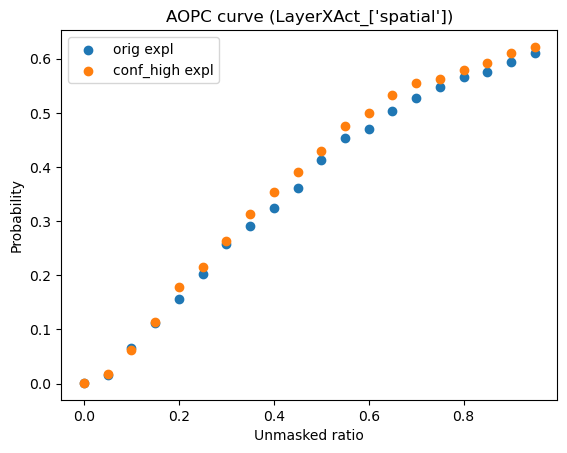

tensor(0.3524) tensor(0.3685)


In [292]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(np.arange(0, 1, 0.05), total_results[0], label = "orig expl")
plt.scatter(np.arange(0, 1, 0.05), total_results[1], label = "conf_high expl")
# plt.scatter(np.arange(0, 1, 0.05), total_results[2], label = "conf_low expl")
plt.legend()
plt.title(f"AOPC curve ({expl_method}_{transform})")
plt.xlabel("Unmasked ratio")
plt.ylabel("Probability")
plt.show()

print(total_results[0].mean(), total_results[1].mean())
